### **Generating Random Data:**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

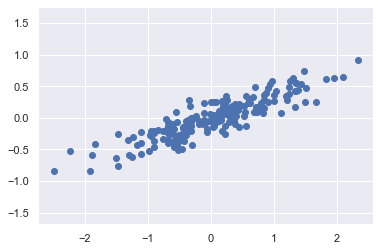

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]
[0.97634101 0.02365899]


### Plotting Principal Axes: ###

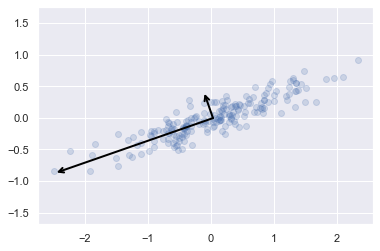

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      color="black",
                      shrinkA=0, shrinkB=0)
    # Abusing method intention -- v1 is point to "label" and 
    # v0 is where the "label" is supposed to be -- but we pass in empty text
    # Result is no just an arrow (blank label pointing to a specific point)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### **Projecting Data onto Two Principal Axes (i.e. Plotting Principal Components:**

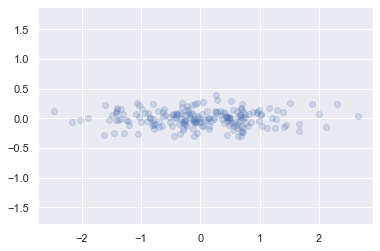

In [12]:
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.axis('equal');

### PCA for Dimensionality Reduction: ###

In [13]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Original Data Shape: ", X.shape)
print("Tranformed Data Shape: ", X_pca.shape)

Original Data Shape:  (200, 2)
Tranformed Data Shape:  (200, 1)


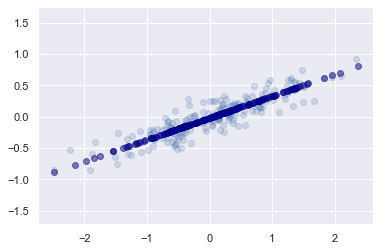

In [23]:
# Creating new set of data via inverse transform and comparing with original data
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], c="#00008B", alpha=0.5)
plt.axis("equal");